In [1]:
require 'torch'
require 'nn'
require 'cunn'
require 'nnx'
require 'optim'
require 'image'
require 'dataset-mnist'
require 'pl'
require 'paths'

In [2]:
function weights_init(m)
   local name = torch.type(m)
   if name:find('Convolution') then
      m.weight:normal(0.0, 0.02)
      m:noBias()
   elseif name:find('BatchNormalization') then
      if m.weight then m.weight:normal(1.0, 0.02) end
      if m.bias then m.bias:fill(0) end
   end
end



In [3]:
model_path = 'logs/mnist.net.20'

In [4]:


print('<trainer> reloading previously trained network')
model = torch.load(model_path)

modelD = model:double()

-- retrieve parameters and gradients

-- verbose
print('<mnist> using model:')
print(modelD)



<trainer> reloading previously trained network	


<mnist> using model:	
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> output]
  (1): nn.SpatialConvolutionMM(1 -> 32, 5x5)
  (2): nn.Tanh
  (3): nn.SpatialMaxPooling(3x3, 3,3, 1,1)
  (4): nn.SpatialConvolutionMM(32 -> 64, 5x5)
  (5): nn.Tanh
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.Reshape(576)
  (8): nn.Linear(576 -> 200)
  (9): nn.Tanh
  (10): nn.Linear(200 -> 10)
  (11): nn.LogSoftMax
}
{
  gradInput : DoubleTensor - size: 10x1x32x32
  modules : 
    {
      1 : 
        nn.SpatialConvolutionMM(1 -> 32, 5x5)
        {
          padW : 0
          nInputPlane : 1
          output : DoubleTensor - size: 10x32x28x28
          gradInput : DoubleTensor - size: 10x1x32x32
          _type : torch.DoubleTensor
   

       dH : 1
          dW : 1
          nOutputPlane : 32
          bias : DoubleTensor - size: 32
          kH : 5
          finput : DoubleTensor - empty
          weight : DoubleTensor - size: 32x25
          gradWeight : DoubleTensor - size: 32x25
          fgradInput : DoubleTensor - empty
 

         gradBias : DoubleTensor - size: 32
          padH : 0
          kW : 5
        }
      2 : 
        nn.Tanh
        {
          gradInput : DoubleTensor - size: 10x32x28x28
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x32x28x28
        }
      3 : 
        nn.SpatialMaxPooling(3x3, 3,3, 1,1)
        {
          dH : 3
          dW : 3
          kW : 3
          gradInput : DoubleTensor - size: 10x32x28x28
          kH : 3
          indices : DoubleTensor - size: 10x32x10x10
          padW : 1
          _type : torch.DoubleTensor
          padH : 1
          ceil_mode : false
          iheight : 28
          output : DoubleTensor - size: 10x32x10x10
        

  iwidth : 28
        }
      4 : 
        nn.SpatialConvolutionMM(32 -> 64, 5x5)
        {
          padW : 0
          nInputPlane : 32
          output : DoubleTensor - size: 10x64x6x6
          gradInput : DoubleTensor - size: 10x32x10x10
          _type : torch.DoubleTensor
          dH : 1
          dW : 1
          nOutputPlane : 64
          bias : DoubleTensor - size: 64
          kH : 5
          finput : DoubleTensor - empty
          weight : DoubleTensor - size: 64x800
          gradWeight : DoubleTensor - size: 64x800
          fgradInput : DoubleTensor - empty
          gradBias : DoubleTensor - size: 64
          padH : 0
          kW : 5
        }
      5 : 
        nn.Tanh
  

      {
          gradInput : DoubleTensor - size: 10x64x6x6
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x64x6x6
        }
      6 : 
        nn.SpatialMaxPooling(2x2, 2,2)
        {
          dH : 2
          dW : 2
          kW : 2
          gradInput : DoubleTensor - size: 10x64x6x6
          kH : 2
          indices : DoubleTensor - size: 10x64x3x3
          padW : 0
          _type : torch.DoubleTensor
          padH : 0
          ceil_mode : false
          iheight : 6
          output : DoubleTensor - size: 10x64x3x3
          iwidth : 6
        }
      7 : 
        nn.Reshape(576)
 

       {
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x576
          gradInput : DoubleTensor - size: 10x64x3x3
          size : LongStorage - size: 1
          batchsize : LongStorage - size: 2
          nelement : 576
        }
      8 : 
        nn.Linear(576 -> 200)
        {
          gradBias : DoubleTensor - size: 200
          weight : DoubleTensor - size: 200x576
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x200
          gradInput : DoubleTensor - size: 10x576
          gradWeight : DoubleTensor - size: 200x576
          bias : DoubleTensor - size: 200
          addBuffer : DoubleTensor - size: 10
        }
      9 : 
 

       nn.Tanh
        {
          gradInput : DoubleTensor - size: 10x200
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x200
        }
      10 : 
        nn.Linear(200 -> 10)
        {
          gradBias : DoubleTensor - size: 10
          weight : DoubleTensor - size: 10x200
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x10
          gradInput : DoubleTensor - size: 10x200
          gradWeight : DoubleTensor - size: 10x200
          bias : DoubleTensor - size: 10
          addBuffer : DoubleTensor - size: 10
        }
      11 : 
        nn.LogSoftMax
        {
          gradInput : DoubleTensor - size: 10x10
          _type : torch.DoubleTensor
          output : DoubleTensor - size: 10x10
        }
    }
  _type : torch.DoubleTensor
  output : DoubleTensor - size: 10x10
}


In [13]:

----------------------------------------------------------------------
-- loss function: negative log-likelihood
--
criterion = nn.ClassNLLCriterion()

adversarial_fast = dofile('adversarial-fast.lua')


----------------------------------------------------------------------
-- get/create dataset
--

-- create training set and normalize
trainData = mnist.loadTrainSet(nbTrainingPatches, geometry)
trainData:normalizeGlobal(mean, std)

-- create test set and normalize
testData = mnist.loadTestSet(nbTestingPatches, geometry)
testData:normalizeGlobal(mean, std)


geometry = {32,32}
dataset = trainData
batchSize = 200
inputs = torch.Tensor(batchSize,1,geometry[1],geometry[2])
targets = torch.Tensor(batchSize)

local k = 1

for i = 1,math.min(batchSize,dataset:size()) do
         -- load new sample
         local sample = dataset[i]
         local input = sample[1]:clone()
         local _,target = sample[2]:clone():max(1)
         target = target:squeeze()
         inputs[k] = input
         targets[k] = target
         k = k + 1
end



classes = {'1','2','3','4','5','6','7','8','9','10'}

confusion = optim.ConfusionMatrix(classes)

local preds = modelD:forward(inputs)

for i = 1,batchSize do
    confusion:add(preds[i], targets[i])
end

print(confusion)
confusion:zero()

local intensity = 0.3

inputs_adv = adversarial_fast(modelD, criterion, inputs, targets, 1, intensity)

local preds = modelD:forward(inputs_adv)

for i = 1,batchSize do
    confusion:add(preds[i], targets[i])
end

print(confusion)
-- print(inputs_adv)



<mnist> done	


<mnist> done	


ConfusionMatrix:
[[      21       0       0       0       0       0       0       0       0       0]   100.000% 	[class: 1]
 [       0      26       0       0       0       0       0       0       0       0]   100.000% 	[class: 2]
 [       0       0      20       0       0       0       0       0       0       0]   100.000% 	[class: 3]
 [       0       0       0      21       0       0       0       0       0       0]   100.000% 	[class: 4]
 [       0       0       0       0      21       0       0       0       0       0]   100.000% 	[class: 5]
 [       0       0       0       0       0      13       0       0       0       0]   100.000% 	[class: 6]
 [       0       0       0       0       0       0      19       0       0       0]   100.000% 	[class: 7]
 [       0       0       0       0       0       0       0      21       0       0]   100.000% 	[class: 8]
 [       0       0       0       0       0       0       0       0      15       0]   100.000% 	[class: 9]
 [       0       0  

ConfusionMatrix:
[[      13       0       1       0       0       0       1       0       2       4]   61.905% 	[class: 1]
 [       0       7       2       3       5       0       0       6       3       0]   26.923% 	[class: 2]
 [       1       1       6       8       0       0       1       1       2       0]   30.000% 	[class: 3]
 [       0       0       2      15       0       2       0       0       1       1]   71.429% 	[class: 4]
 [       0       0       1       0       8       0       3       0       3       6]   38.095% 	[class: 5]
 [       0       0       0       5       0       0       0       0       8       0]   0.000% 	[class: 6]
 [       1       0       0       0       0       2      10       0       6       0]   52.632% 	[class: 7]
 [       0       0       1       3       0       0       0       3       4      10]   14.286% 	[class: 8]
 [       0       0       2       3       0       0       0       0       9       1]   60.000% 	[class: 9]
 [       0       0       0    

In [12]:
local nc = 1
local nz = 100
local ngf = 8
local real_label = 1
local fake_label = 0

local SpatialBatchNormalization = nn.SpatialBatchNormalization
local SpatialConvolution = nn.SpatialConvolution
local SpatialFullConvolution = nn.SpatialFullConvolution


local netG = nn.Sequential()
local intensity = 0.2
-- input is (nc) x 64 x 64
netG:add(SpatialConvolution(nc, ngf, 4, 4, 2, 2, 1, 1))
netG:add(nn.LeakyReLU(0.2, true))
-- state size: (ngf) x 32 x 32
netG:add(SpatialConvolution(ngf, ngf * 2, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf * 2)):add(nn.LeakyReLU(0.2, true))
-- state size: (ngf*2) x 16 x 16
netG:add(SpatialConvolution(ngf * 2, ngf * 4, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf * 4)):add(nn.LeakyReLU(0.2, true))
-- state size: (ngf*4) x 8 x 8
netG:add(SpatialConvolution(ngf * 4, ngf * 8, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf * 8)):add(nn.LeakyReLU(0.2, true))
-- state size: (ngf*8) x 4 x 4

-- netG:add(SpatialConvolution(ngf * 8, ngf * 16, 4, 4, 2, 2, 1, 1))
-- netG:add(SpatialBatchNormalization(ndf * 16)):add(nn.LeakyReLU(0.2, true))
-- state size: (ngf*16) x 2 x 2

-- netG:add(SpatialFullConvolution(ngf*16, ngf * 8, 4, 4))
-- netG:add(SpatialBatchNormalization(ngf * 8)):add(nn.ReLU(true))
-- state size: (ngf*8) x 4 x 4
netG:add(SpatialFullConvolution(ngf * 8, ngf * 4, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf * 4)):add(nn.ReLU(true))
-- state size: (ngf*4) x 8 x 8
netG:add(SpatialFullConvolution(ngf * 4, ngf * 2, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf * 2)):add(nn.ReLU(true))
-- state size: (ngf*2) x 16 x 16
netG:add(SpatialFullConvolution(ngf * 2, ngf, 4, 4, 2, 2, 1, 1))
netG:add(SpatialBatchNormalization(ngf)):add(nn.ReLU(true))
-- state size: (ngf) x 32 x 32
netG:add(SpatialFullConvolution(ngf, nc, 4, 4, 2, 2, 1, 1))
netG:add(nn.Tanh())
netG:add(nn.Clamp(-intensity, intensity))

-- state size: (nc) x 64 x 64

netG:apply(weights_init)

modelG = nn.Sequential()
         :add(nn.ConcatTable()
            :add(netG)
            :add(nn.Identity()))
         :add(nn.CAddTable(true))


print(modelG)




nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> output]
      |      (1): nn.SpatialConvolution(1 -> 8, 4x4, 2,2, 1,1) without bias
      |      (2): nn.LeakyReLU(0.2)
      |      (3): nn.SpatialConvolution(8 -> 16, 4x4, 2,2, 1,1) without bias
      |      (4): nn.SpatialBatchNormalization (4D) (16)
      |      (5): nn.LeakyReLU(0.2)
      |      (6): nn.SpatialConvolution(16 -> 32, 4x4, 2,2, 1,1) without bias
      |      (7): nn.SpatialBatchNormalization (4D) (32)
      |      (8): nn.LeakyReLU(0.2)
      |      (9): nn.SpatialConvolution(32 -> 64, 4x4, 2,2, 1,1) without bias
      |      (10): nn.SpatialBatchNormalization (4D) (64)
      |      (11): nn.LeakyReLU(0.2)
      |      (12): nn.SpatialFullConvolution(64 -> 3

(4): nn.SpatialBatchNormalization (4D) (16)
                  (5): nn.LeakyReLU(0.2)
                  (6): nn.SpatialConvolution(16 -> 32, 4x4, 2,2, 1,1) without bias
                  (7): nn.SpatialBatchNormalization (4D) (32)
                  (8): nn.LeakyReLU(0.2)
                  (9): nn.SpatialConvolution(32 -> 64, 4x4, 2,2, 1,1) without bias
                  (10): nn.SpatialBatchNormalization (4D) (64)
                  (11): nn.LeakyReLU(0.2)
                  (12): nn.SpatialFullConvolution(64 -> 32, 4x4, 2,2, 1,1) without bias
                  (13): nn.SpatialBatchNormalization (4D) (32)
                  (14): nn.ReLU
                  (15): nn.SpatialFullConvolution(32 -> 16, 4x4, 2,2, 1,1) without bias
                  (16): nn.SpatialBatchNormalization (4D) (16)
                  (17): nn.ReLU
                  (18): nn.SpatialFullConvolution(16 -> 8, 4x4, 2,2, 1,1) without bias
                  (19): nn.SpatialBatchNormalization (4D) (8)
                  (20): nn

In [14]:

inputs_adv = modelG:forward(inputs)

local preds = modelD:forward(inputs_adv)

confusion:zero()
for i = 1,batchSize do
    confusion:add(preds[i], targets[i])
end

print(confusion)

require 'optim'


parameters,gradParameters = modelG:getParameters()
optimStateG = {
   learningRate = 0.001,
}


for epoch = 1, 200 do
   -- local function we give to optim
   -- it takes current weights as input, and outputs the loss
   -- and the gradient of the loss with respect to the weights
   -- gradParams is calculated implicitly by calling 'backward',
   -- because the model's weight and bias gradient tensors
   -- are simply views onto gradParams
   function feval(parameters)
      gradParameters:zero()

      local gen = modelG:forward(inputs)
      local outputs = modelD:forward(gen)
      local loss = criterion:forward(outputs, targets)
      local df_do = criterion:backward(outputs, targets)
      local df_dg = modelD:updateGradInput(gen, df_do)

      modelG:backward(inputs, df_dg)
      print('<trainer> loss on training set:'..loss)
      return loss, gradParameters:mul(-1)
   end
    
   optim.sgd(feval, parameters, optimStateG)
end

inputs_adv = modelG:forward(inputs)

local preds = modelD:forward(inputs_adv)

confusion:zero()
for i = 1,batchSize do
    confusion:add(preds[i], targets[i])
end

print(confusion)


-- train G

ConfusionMatrix:
[[      20       0       0       0       0       0       0       0       1       0]   95.238% 	[class: 1]
 [       0       2       2       0      10       0       0       3       9       0]   7.692% 	[class: 2]
 [       1       1       9       8       0       0       0       1       0       0]   45.000% 	[class: 3]
 [       0       0       0      21       0       0       0       0       0       0]   100.000% 	[class: 4]
 [       0       0       0       0      17       0       0       0       3       1]   80.952% 	[class: 5]
 [       0       1       0       2       0       2       0       0       8       0]   15.385% 	[class: 6]
 [       0       0       0       0       0       2      15       0       2       0]   78.947% 	[class: 7]
 [       0       0       0       3       0       0       0      10       1       7]   47.619% 	[class: 8]
 [       0       0       0       0       0       0       0       0      15       0]   100.000% 	[class: 9]
 [       0       0       0  

 9 : 9
      10 : 10
    }
  _prediction : FloatTensor - size: 10
  _pred_idx : LongTensor - size: 1
  nclasses : 10
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 10
  totalValid : 0.615
}


<trainer> loss on training set:1.1344811458654	


<trainer> loss on training set:1.1397594597299	


<trainer> loss on training set:1.1448897378545	


<trainer> loss on training set:1.1497564339666	


<trainer> loss on training set:1.1544305210504	


<trainer> loss on training set:1.1589253451476	


<trainer> loss on training set:1.1632949075808	


<trainer> loss on training set:1.1675303949169	


<trainer> loss on training set:1.1716424837537	


<trainer> loss on training set:1.1756618326862	


<trainer> loss on training set:1.1795532312274	


<trainer> loss on training set:1.183314705748	


<trainer> loss on training set:1.1869100333992	


<trainer> loss on training set:1.1904417284517	


<trainer> loss on training set:1.1939195054749	


<trainer> loss on training set:1.1973381357973	


<trainer> loss on training set:1.2006932006719	


<trainer> loss on training set:1.2039706908297	


<trainer> loss on training set:1.2071087808183	


<trainer> loss on training set:1.2101988505949	


<trainer> loss on training set:1.2132683969688	


<trainer> loss on training set:1.2162770813843	


<trainer> loss on training set:1.2191877323058	


<trainer> loss on training set:1.2219980356541	


<trainer> loss on training set:1.2247103277843	


<trainer> loss on training set:1.2273618965227	


<trainer> loss on training set:1.2299859354667	


<trainer> loss on training set:1.232544053483	


<trainer> loss on training set:1.2350354192345	


<trainer> loss on training set:1.2374660770272	


<trainer> loss on training set:1.2398767351836	


<trainer> loss on training set:1.2422203343512	


<trainer> loss on training set:1.2445315354664	


<trainer> loss on training set:1.2467852505407	


<trainer> loss on training set:1.2490108092755	


<trainer> loss on training set:1.2512470162055	


<trainer> loss on training set:1.2534726646509	


<trainer> loss on training set:1.2556471327116	


<trainer> loss on training set:1.2578240689853	


<trainer> loss on training set:1.259942344076	


<trainer> loss on training set:1.2620245913642	


<trainer> loss on training set:1.2640562061913	


<trainer> loss on training set:1.2660841923693	


<trainer> loss on training set:1.2680712561059	


<trainer> loss on training set:1.2700272125067	


<trainer> loss on training set:1.2719481900548	


<trainer> loss on training set:1.273895681819	


<trainer> loss on training set:1.2757826411554	


<trainer> loss on training set:1.2776790906517	


<trainer> loss on training set:1.2795392349095	


<trainer> loss on training set:1.281375847115	

<trainer> loss on training set:1.2832173397255	


<trainer> loss on training set:1.2850589895317	


<trainer> loss on training set:1.2868846430802	


<trainer> loss on training set:1.2886722926173	


<trainer> loss on training set:1.2904762282653	


<trainer> loss on training set:1.2922396576151	


<trainer> loss on training set:1.2940074503144	


<trainer> loss on training set:1.2957495146017	


<trainer> loss on training set:1.2974919087451	


<trainer> loss on training set:1.2992152054011	


<trainer> loss on training set:1.3009172396049	


<trainer> loss on training set:1.3025637172898	


<trainer> loss on training set:1.3042089408774	


<trainer> loss on training set:1.3058732724807	


<trainer> loss on training set:1.3074951318305	


<trainer> loss on training set:1.3091260994735	


<trainer> loss on training set:1.3107395111685	


<trainer> loss on training set:1.3123740132639	


<trainer> loss on training set:1.314053474199	


<trainer> loss on training set:1.3158134361316	


<trainer> loss on training set:1.3174298689404	


<trainer> loss on training set:1.3190873213191	


<trainer> loss on training set:1.3206149943913	


<trainer> loss on training set:1.3222963067864	


<trainer> loss on training set:1.3238840135847	


<trainer> loss on training set:1.3255301241115	


<trainer> loss on training set:1.3270498544081	


<trainer> loss on training set:1.328755253536	


<trainer> loss on training set:1.3303262327322	


<trainer> loss on training set:1.3320123467587	


<trainer> loss on training set:1.3336448301656	


<trainer> loss on training set:1.3352848742756	


<trainer> loss on training set:1.336890191469	


<trainer> loss on training set:1.3384811259788	


<trainer> loss on training set:1.3400410147974	


<trainer> loss on training set:1.3415899924749	


<trainer> loss on training set:1.3430411884252	


<trainer> loss on training set:1.3447422094377	


<trainer> loss on training set:1.3462095859646	


<trainer> loss on training set:1.3479294836581	


<trainer> loss on training set:1.3494127572502	


<trainer> loss on training set:1.3510925656725	


<trainer> loss on training set:1.3526121861332	


<trainer> loss on training set:1.3542960823311	


<trainer> loss on training set:1.3558001524438	


<trainer> loss on training set:1.3574417722231	


<trainer> loss on training set:1.3589557249056	


<trainer> loss on training set:1.360593138479	


<trainer> loss on training set:1.3621298848912	


<trainer> loss on training set:1.3637380390392	


<trainer> loss on training set:1.3652996405545	


<trainer> loss on training set:1.366916566635	


<trainer> loss on training set:1.3685277726128	


<trainer> loss on training set:1.3701847825149	


<trainer> loss on training set:1.3718475492944	


<trainer> loss on training set:1.3735289146577	


<trainer> loss on training set:1.3751527590216	


<trainer> loss on training set:1.3767846467618	


<trainer> loss on training set:1.3783733973673	


<trainer> loss on training set:1.3799143880526	


<trainer> loss on training set:1.3813524024167	


<trainer> loss on training set:1.3828286720623	


<trainer> loss on training set:1.3842691612004	


<trainer> loss on training set:1.3858403624574	


<trainer> loss on training set:1.3874183577335	


<trainer> loss on training set:1.3890893030136	


<trainer> loss on training set:1.3908498748214	


<trainer> loss on training set:1.392551256219	


<trainer> loss on training set:1.3943490823244	


<trainer> loss on training set:1.3961114216943	


<trainer> loss on training set:1.3978480381135	


<trainer> loss on training set:1.3995463275838	


<trainer> loss on training set:1.4012504545864	


<trainer> loss on training set:1.4028266520151	


<trainer> loss on training set:1.4045458664551	


<trainer> loss on training set:1.4061512059676	


<trainer> loss on training set:1.4078433893318	


<trainer> loss on training set:1.40938551103	


<trainer> loss on training set:1.4110473004482	


<trainer> loss on training set:1.4126403594129	


<trainer> loss on training set:1.4143551897768	


<trainer> loss on training set:1.4159542665525	


<trainer> loss on training set:1.4175421578336	


<trainer> loss on training set:1.4190511997359	


<trainer> loss on training set:1.4203999092667	


<trainer> loss on training set:1.4223554550865	


<trainer> loss on training set:1.4239946887693	


<trainer> loss on training set:1.4259294473641	


<trainer> loss on training set:1.4276875922496	


<trainer> loss on training set:1.4296061820875	


<trainer> loss on training set:1.4313005167291	


<trainer> loss on training set:1.4331274336748	


<trainer> loss on training set:1.4348685012435	


<trainer> loss on training set:1.436594787093	


<trainer> loss on training set:1.4383219940344	


<trainer> loss on training set:1.4399965572047	


<trainer> loss on training set:1.4418279002068	


<trainer> loss on training set:1.4434780233306	


<trainer> loss on training set:1.4451546979524	


<trainer> loss on training set:1.4468109888827	


<trainer> loss on training set:1.4484718783226	


<trainer> loss on training set:1.4501278529237	


<trainer> loss on training set:1.4520484049794	


<trainer> loss on training set:1.4535880161216	


<trainer> loss on training set:1.4554521493183	


<trainer> loss on training set:1.4571478363117	


<trainer> loss on training set:1.4588809932908	


<trainer> loss on training set:1.4604814689975	


<trainer> loss on training set:1.462383122922	


<trainer> loss on training set:1.4638736344829	


<trainer> loss on training set:1.4660566401944	


<trainer> loss on training set:1.4676157882584	


<trainer> loss on training set:1.4695841369312	


<trainer> loss on training set:1.471235674123	


<trainer> loss on training set:1.4730087951142	


<trainer> loss on training set:1.474460304241	


<trainer> loss on training set:1.4764419026907	


<trainer> loss on training set:1.4783003833253	


<trainer> loss on training set:1.4803688213853	


<trainer> loss on training set:1.4823882897896	


<trainer> loss on training set:1.4846775872914	


<trainer> loss on training set:1.486767154204	


<trainer> loss on training set:1.4888368229934	


<trainer> loss on training set:1.4907453080707	


<trainer> loss on training set:1.4928345102787	


<trainer> loss on training set:1.4945977459377	


<trainer> loss on training set:1.4965590874811	


<trainer> loss on training set:1.4982902089829	


<trainer> loss on training set:1.5001444313785	


<trainer> loss on training set:1.5018250450326	


<trainer> loss on training set:1.5036707240517	


<trainer> loss on training set:1.5052011887266	


<trainer> loss on training set:1.5071346561683	


<trainer> loss on training set:1.5083097776782	


<trainer> loss on training set:1.5108178446911	


<trainer> loss on training set:1.5122606997669	


<trainer> loss on training set:1.5147589296145	


<trainer> loss on training set:1.5163698484629	


<trainer> loss on training set:1.5189683285445	


<trainer> loss on training set:1.5208043355799	


<trainer> loss on training set:1.5234875088038	


<trainer> loss on training set:1.5255532406126	


<trainer> loss on training set:1.5281075110433	


<trainer> loss on training set:1.5301244125053	


<trainer> loss on training set:1.5325838489082	


<trainer> loss on training set:1.5345219103104	


<trainer> loss on training set:1.5367137501844	


<trainer> loss on training set:1.5385088674788	


<trainer> loss on training set:1.5405603706839	


ConfusionMatrix:
[[      19       0       0       0       0       1       0       0       1       0]   90.476% 	[class: 1]
 [       0       2       2       0       8       0       0       3      11       0]   7.692% 	[class: 2]
 [       1       1       7       9       0       0       0       2       0       0]   35.000% 	[class: 3]
 [       0       0       0      20       0       0       0       0       0       1]   95.238% 	[class: 4]
 [       0       0       0       0      16       0       0       0       3       2]   76.190% 	[class: 5]
 [       0       1       0       3       0       1       0       0       8       0]   7.692% 	[class: 6]
 [       0       0       0       0       0       2      13       0       4       0]   68.421% 	[class: 7]
 [       0       0       0       3       0       0       0       7       1      10]   33.333% 	[class: 8]
 [       0       0       0       1       0       0       0       0      14       0]   93.333% 	[class: 9]
 [       0       0       0     

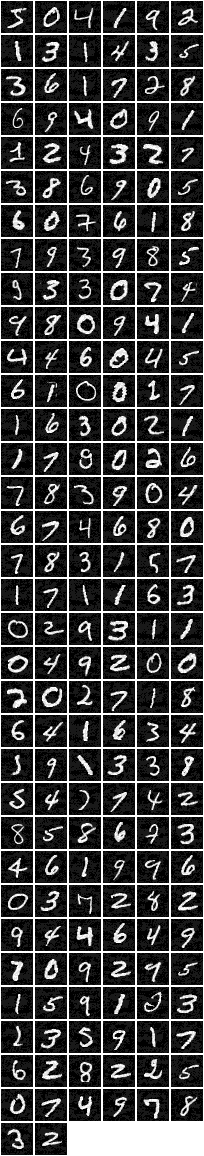

In [12]:
require 'image'
itorch.image(inputs/torch.max(torch.abs(inputs)))

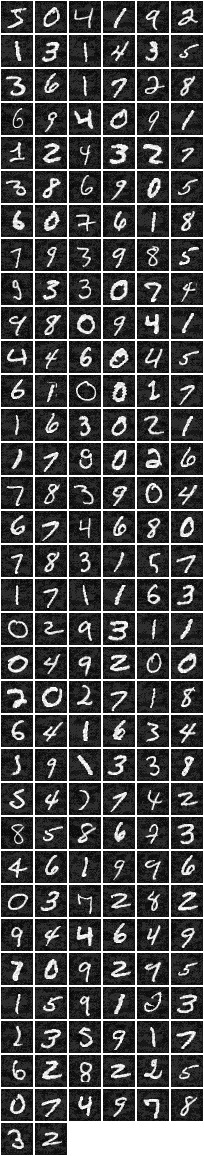

In [15]:
require 'image'
itorch.image(inputs_adv/torch.max(torch.abs(inputs_adv)))

In [10]:
type(inputs_adv)

userdata	


In [28]:
inputs_adv = adversarial_fast(modelD, criterion, inputs, targets, 1, intensity)

local preds = modelD:forward(inputs_adv)
confusion:zero()
for i = 1,batchSize do
    confusion:add(preds[i], targets[i])
end

ConfusionMatrix:
[[       0       0       1       3       0       5       5       0       6       1]   0.000% 	[class: 1]
 [       0       0       1       1       5       0       0       4      15       0]   0.000% 	[class: 2]
 [       1       1       0      14       0       0       0       4       0       0]   0.000% 	[class: 3]
 [       0       0       4       0       4       5       0       1       6       1]   0.000% 	[class: 4]
 [       0       0       1       2       0       0       1       8       3       6]   0.000% 	[class: 5]
 [       0       1       0       3       0       0       0       0       9       0]   0.000% 	[class: 6]
 [       0       0       0       5       2       1       0       3       8       0]   0.000% 	[class: 7]
 [       0       0       1      10       0       1       0       0       2       7]   0.000% 	[class: 8]
 [       0       0       1       7       1       1       0       0       0       5]   0.000% 	[class: 9]
 [       0       0       0       1    

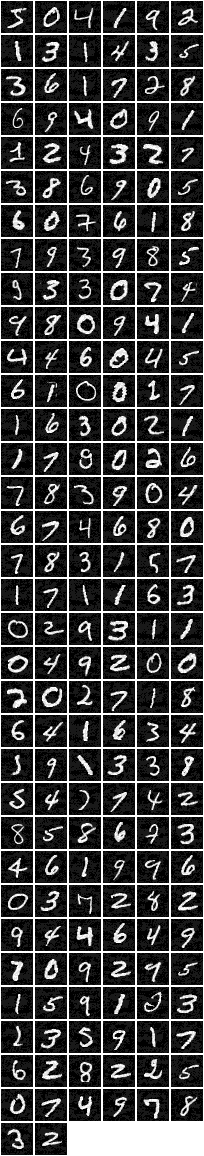

In [36]:
itorch.image(inputs_adv/torch.max(torch.abs(inputs_adv)))

In [6]:
confusion = optim.ConfusionMatrix


bad argument #1 to '?' (expecting number or torch.LongTensor or torch.LongStorage at /home/fei/torch/pkg/torch/generic/Tensor.c:1125)
stack traceback:
	[C]: at 0x7f491e1994d0
	[C]: in function 'LongTensor'
	...ei/torch/install/share/lua/5.1/optim/ConfusionMatrix.lua:20: in function '__init'
	/home/fei/torch/install/share/lua/5.1/torch/init.lua:91: in function </home/fei/torch/install/share/lua/5.1/torch/init.lua:87>
	[C]: in function 'ConfusionMatrix'
	[string "confusion = optim.ConfusionMatrix()..."]:1: in main chunk
	[C]: in function 'xpcall'
	/home/fei/torch/install/share/lua/5.1/itorch/main.lua:210: in function </home/fei/torch/install/share/lua/5.1/itorch/main.lua:174>
	/home/fei/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/fei/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/fei/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/fei/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/fei/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00405d50: 

In [1]:
classes = {'1','2','3','4','5','6','7','8','9','10'}


In [2]:
confusion = optim.ConfusionMatrix(classes)

In [8]:
#classes

10	
